In [ ]:
import tensorflow 

Data pre-Processing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM,MaxPooling1D,Embedding    ##ConvID
from tensorflow.keras.models import Model





In [ ]:
df=pd.read_csv('/content/251533~1.CSV',encoding='ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df=df.drop(["Unnamed: 2","Unnamed: 3", "Unnamed: 4"],axis=1)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.columns=['labels','data']

In [ ]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
 df['b_labels']=df['labels'].map({'ham':0,'spam':1})
 y=df['b_labels'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df['data'],y,test_size=0.2)

convert sentence to sequences

In [ ]:
max_vocab_size=20000
tokenizer=Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(x_train)
sequneces_train=tokenizer.texts_to_sequences(x_train)
sequneces_test=tokenizer.texts_to_sequences(x_test)

Check word index mapping to check the number of words in vocabulary

In [ ]:
word2idx=tokenizer.word_index

In [ ]:
v=len(word2idx)

In [ ]:
print('Total number of unique tokens are: %s' %v)

Total number of unique tokens are: 7862


pad sequences to get Nx T matrix

In [ ]:
data_train=pad_sequences(sequneces_train)
print('Shape of train data' ,data_train.shape)

Shape of train data (4457, 189)


In [ ]:
data_train[0]
len(data_train[0])

189

In [ ]:
T=data_train.shape[1]
print(T)

189


In [ ]:
data_test=pad_sequences(sequneces_test,maxlen=T)
print('Shape of test data' ,data_test.shape)

Shape of test data (1115, 189)


Building the Model CNN

In [ ]:
# create the model
# choose embedding dimensionality
D=20  # this is hyper parameter ,we can choose any vector that we want

# input layer
i=Input(shape=(T,)) # input layer takes in sequneces of integers,so shape is T
# Embedding layer
x=Embedding(v+1,D)(i)  # This takes in sequences of integers and return sequences of word vectors
# This will be an N*T*D array
# We want size of embedding to (V+1)*D,because first word index starts from 1 and not 0

#First CNN layer
x=Conv1D(32,3, activation='relu')(x)
x=MaxPooling1D(3)(x)

# Second CNN layer
x=Conv1D(64,3, activation='relu')(x)
x=MaxPooling1D(3)(x)

# Third CNN layer

x=Conv1D(128,3, activation='relu')(x)
x=GlobalMaxPooling1D()(x)

# dense layer
x= Dense(1,activation='sigmoid')(x)

model=Model(i,x)






In [ ]:
# compile the model

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#train the model
t=model.fit(x=data_train,y=y_train,epochs=5,validation_data=(data_test,y_test))



Epoch 1/5
140/140 [==============================] - 3s 21ms/step - loss: 0.0156 - accuracy: 0.9953 - val_loss: 0.0510 - val_accuracy: 0.9874
Epoch 2/5
140/140 [==============================] - 3s 20ms/step - loss: 0.0047 - accuracy: 0.9993 - val_loss: 0.0732 - val_accuracy: 0.9848
Epoch 3/5
140/140 [==============================] - 3s 20ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0472 - val_accuracy: 0.9892
Epoch 4/5
140/140 [==============================] - 3s 21ms/step - loss: 0.0018 - accuracy: 0.9993 - val_loss: 0.0654 - val_accuracy: 0.9883
Epoch 5/5
140/140 [==============================] - 3s 21ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0537 - val_accuracy: 0.9892


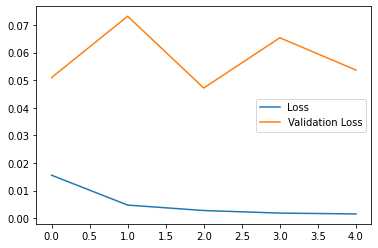

In [ ]:
#loss per iteration
import matplotlib.pyplot as plt

plt.plot(t.history['loss'],label='Loss')
plt.plot(t.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()


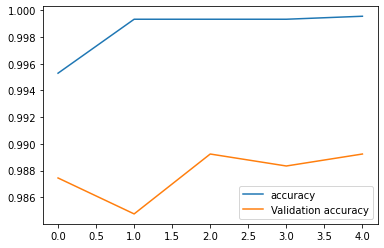

In [ ]:
#loss per iteration
import matplotlib.pyplot as plt

plt.plot(t.history['accuracy'],label='accuracy')
plt.plot(t.history['val_accuracy'],label='Validation accuracy')
plt.legend()
plt.show()

Building the Model RNN

In [ ]:
# create the model
# choose embedding dimensionality
D=20  # this is hyper parameter ,we can choose any vector that we want

M= 15  # Hidden state vectorizer(dimenstionality)
# input layer
i=Input(shape=(T,)) # input layer takes in sequneces of integers,so shape is T
# Embedding layer
x=Embedding(v+1,D)(i)  # This takes in sequences of integers and return sequences of word vectors
# This will be an N*T*D array
# We want size of embedding to (V+1)*D,because first word index starts from 1 and not 0

#LSTM layer
x=LSTM(M, return_sequences=True)(x)
x=GlobalMaxPooling1D()(x)

# dense layer
x= Dense(1,activation='sigmoid')(x)

model=Model(i,x)


In [ ]:
# compile the model

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#train the model
t=model.fit(x=data_train,y=y_train,epochs=5,validation_data=(data_test,y_test))



Epoch 1/5
140/140 [==============================] - 14s 87ms/step - loss: 0.4725 - accuracy: 0.8387 - val_loss: 0.2575 - val_accuracy: 0.8897
Epoch 2/5
140/140 [==============================] - 11s 77ms/step - loss: 0.1241 - accuracy: 0.9746 - val_loss: 0.0875 - val_accuracy: 0.9758
Epoch 3/5
140/140 [==============================] - 12s 89ms/step - loss: 0.0481 - accuracy: 0.9906 - val_loss: 0.0741 - val_accuracy: 0.9776
Epoch 4/5
140/140 [==============================] - 13s 91ms/step - loss: 0.0303 - accuracy: 0.9937 - val_loss: 0.0607 - val_accuracy: 0.9821
Epoch 5/5
140/140 [==============================] - 11s 77ms/step - loss: 0.0203 - accuracy: 0.9957 - val_loss: 0.0562 - val_accuracy: 0.9857


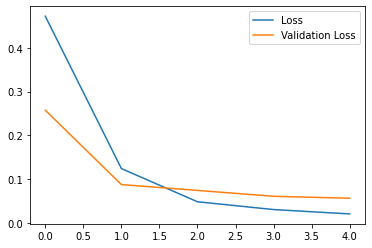

In [ ]:
#loss per iteration
import matplotlib.pyplot as plt

plt.plot(t.history['loss'],label='Loss')
plt.plot(t.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

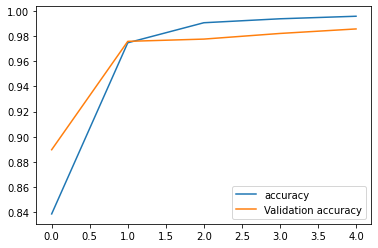

In [ ]:
#loss per iteration
import matplotlib.pyplot as plt

plt.plot(t.history['accuracy'],label='accuracy')
plt.plot(t.history['val_accuracy'],label='Validation accuracy')
plt.legend()
plt.show()